In [1]:
# get the plot in notebook
%matplotlib inline

In [2]:
import xarray as xr

In [3]:
from dask.distributed import Client

In [4]:
from dask_jobqueue import SLURMCluster

In [12]:
cluster = SLURMCluster(queue='analysis', cores=8, project='gfdl_o', memory="96GB")
cluster.scale(1)
client = Client(cluster)

distributed.client - ERROR - Failed to reconnect to scheduler after 10.00 seconds, closing client


In [6]:
client

Client Scheduler: tcp://140.208.147.174:33814 Dashboard: http://140.208.147.174:8787/status,Cluster Workers: 0 Cores: 0 Memory: 0 B


In [7]:
datadir = '/data_cmip6/CMIP6/OMIP/NOAA-GFDL/GFDL-CM4/omip1/r1i1p1f1/Omon/thetao/gr/v20180701/'

ds = xr.open_mfdataset(datadir + '*.nc', chunks={'time': 1})

In [8]:
temp_mean = ds['thetao'].mean(dim=['time'])

In [9]:
temp_mean.sel(lev=2.5)

<xarray.DataArray 'thetao' (lat: 180, lon: 360)>
dask.array<shape=(180, 360), dtype=float32, chunksize=(180, 360)>
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
    lev      float64 2.5

CPU times: user 1min 15s, sys: 5.92 s, total: 1min 21s
Wall time: 16min 44s


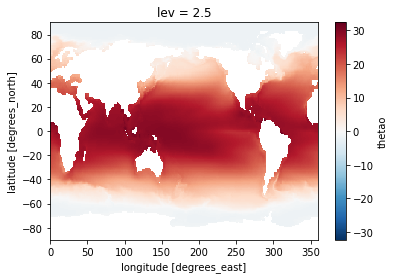

In [10]:
%time temp_mean.sel(lev=2.5).plot()

In [11]:
cluster.close()